In [1]:
import numpy as np
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns 

df=pd.read_csv("/kaggle/input/ramen-ratings/ramen-ratings.csv")
df.head(10)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


In [2]:
df.shape

(2580, 7)

In [3]:
df = df[df['Stars'].notnull() & df['Stars'] != 'Unrated']
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')
df = df.dropna(subset=['Stars'])
print("\nAfter cleaning, shape:", df.shape)


After cleaning, shape: (2577, 7)


In [4]:
constant = [c for c in df.columns if df[c].nunique() == 1]
print("Constant features:", constant)

Constant features: []


In [5]:
qc = []
threshold = 0.98
for c in df.columns:
    top_freq = df[c].value_counts(normalize=True).iloc[0]
    if top_freq >= threshold:
        qc.append(c)
print("Quasi-constant features (>=98%):", qc)

Quasi-constant features (>=98%): []


In [6]:
dups = []
cols = df.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if df[cols[i]].equals(df[cols[j]]):
            dups.append((cols[i], cols[j]))
print("Duplicate columns:", dups)

Duplicate columns: []



Numeric correlation:
           Review #   Stars
Review #    1.0000  0.2435
Stars       0.2435  1.0000


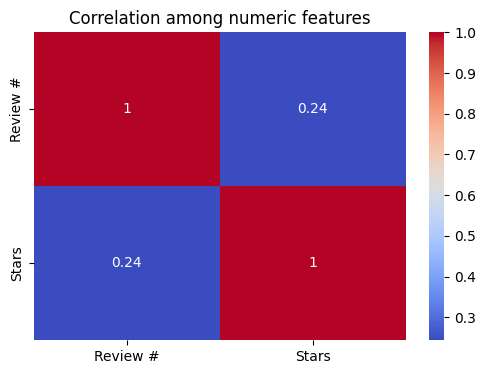

In [7]:
numeric = df.select_dtypes(include=[np.number])
corr = numeric.corr()
print("\nNumeric correlation:\n", corr)

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation among numeric features")
plt.show()


Top 20 features by Mutual Information:
                                                 Feature  MI Score
0                                              Review #  0.092995
2521      Variety_Supreme Bulalo Artificial Bone Marrow  0.047914
1754                Variety_Neoguri Udon Seafood & Mild  0.047436
196                                      Brand_Nongshim  0.045041
885                Variety_Cup Noodles Xo Sauce Seafood  0.041794
2283                                Variety_Shrimp Fish  0.041787
85                                   Brand_Golden Wheat  0.041692
2548       Variety_Tachia Dried Noodles - Fried Shallot  0.041140
2456         Variety_Spring Onion Rice Noodle Soup Bowl  0.040906
2777                                     Country_Canada  0.040588
68                                        Brand_Foodmon  0.039181
2643  Variety_Traveller's Choice Thai Red Curry Flav...  0.039166
178                                   Brand_Mr. Noodles  0.039153
584              Variety_Bowl Noodl

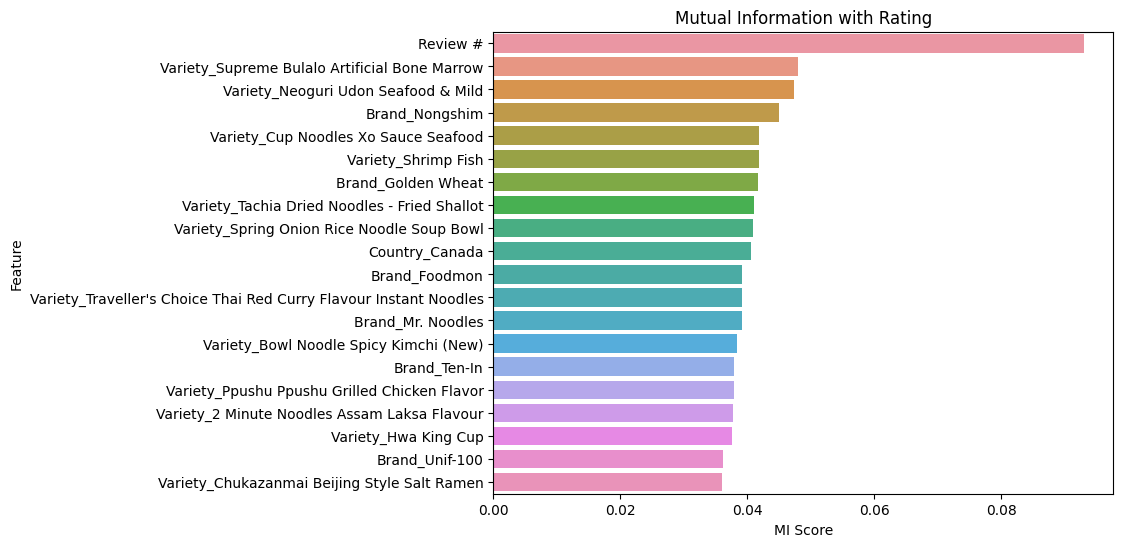

In [8]:
X = pd.get_dummies(df.drop(columns=['Stars']))
y = df['Stars']
mi = mutual_info_regression(X, y, random_state=0)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi})
mi_df = mi_df.sort_values('MI Score', ascending=False).head(20)
print("\nTop 20 features by Mutual Information:\n", mi_df)

plt.figure(figsize=(8, 6))
sns.barplot(x='MI Score', y='Feature', data=mi_df)
plt.title("Mutual Information with Rating")
plt.show()